In [1]:
import sys
import pickle
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline
import numpy as np
#scikit learn 
from sklearn import datasets, svm, metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import os.path

import sklearn
from sklearn.linear_model import LogisticRegression

#! conda install -c anaconda keras

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.layers import Flatten, GaussianNoise
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.utils.vis_utils import plot_model
from keras.optimizers import Adam
from keras.models import load_model

Using TensorFlow backend.


In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Parameters

In [3]:
# directory where pickled data is saved
savedir = "../Data/Experimental data/Synthetic Particles (IAC, 21)/"
# name of the pickle file to save the data onto

#savedir = "G:/Vicente Rocha/Masters project/master_thesis_project/Data/Experimental data/Synthetic Particles (IAC, 21)/"
filename = "database"
keywords = ["POLY", "PMMA", "water"]

#savedir = "../Data/Experimental data/algas e leveduras/"
#savedir = "G:/Vicente Rocha/Masters project/master_thesis_project/Data/Experimental data/algas e leveduras/"
#filename = "database algas e leveduras"
#keywords = ["Algae", "Yeast", "water"]


P = 2  # number of horizontal and vertical bins for the image histogram
nplanes = 1
npoints = 1000000
xlim, ylim, xlim_zoom, ylim_zoom = 0.05, 0.05, 0.025, 0.025

In [4]:
# import script
#sys.path.append("./Data reader/")
sys.path.append("./Data reader/")
import Data_set_creator as data 


# Import data

In [5]:
# runs the main functions that creates the pickle file with the data and data treatment functions
data.main(npoints, data_dir=savedir, filename=filename, P=P, nplanes=nplanes, xlim=xlim, ylim=ylim, xlim_zoom=xlim_zoom, ylim_zoom=ylim_zoom)

(36,)ta/Experimental data/Synthetic Particles (IAC, 21)/water6.dat Read 30 segmentsts
>>> asd Database pickled on ../Data/Experimental data/Synthetic Particles (IAC, 21)/Pickle/ with the namedatabase!


# Loads the pickle file

In [6]:
with open(savedir+"Pickle/"+filename+'.pickle', 'rb') as f:
    database = pickle.load(f)

print(database.data.shape)

(36, 30, 4, 2)


In [7]:
print(database.properties(keywords))

{'type': array(['PMMA', 'PMMA', 'PMMA', 'PMMA', 'PMMA', 'PMMA', 'POLY', 'POLY',
       'POLY', 'POLY', 'POLY', 'POLY', 'POLY', 'POLY', 'POLY', 'POLY',
       'POLY', 'POLY', 'PMMA', 'PMMA', 'PMMA', 'PMMA', 'PMMA', 'PMMA',
       'POLY', 'POLY', 'POLY', 'POLY', 'POLY', 'POLY', 'water', 'water',
       'water', 'water', 'water', 'water'], dtype='<U5'), 'size': array(['3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '4',
       '4', '4', '4', '4', '4', '8', '8', '8', '8', '8', '8', '8', '8',
       '8', '8', '8', '8', 'water', 'water', 'water', 'water', 'water',
       'water'], dtype='<U5')}


<IPython.core.display.Javascript object>


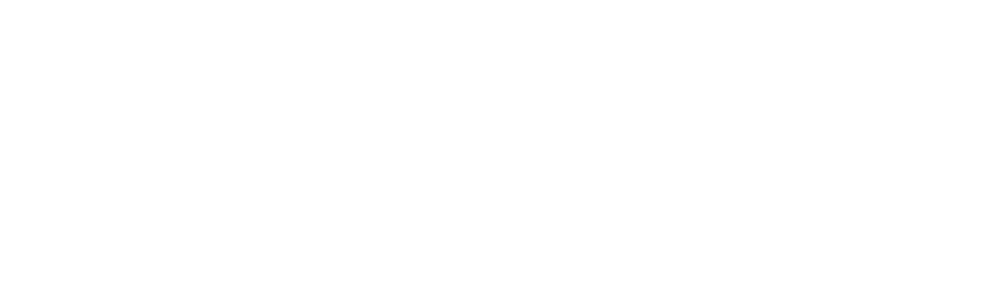

In [8]:
#%matplotlib notebook
_, axes = plt.subplots(nrows=1, ncols=int(5), figsize=(10, 3))
for ax, image, label in zip(axes, database.data[::int(database.data.shape[1]/int(5)), 0], database.targets[::int(database.targets.shape[0]/int(5))]):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')#, extent=(-0.05,0.05,-0.05,0.05))
    ax.set_title(str(label))

### Cross-Validation: K-fold

### K-fold dataset partition into N-k training sets and k testing sets:

In [9]:
# the function k_fold returns an array of lists, each list is a set of k indices from each class.
# together these indices form the whole set of testing dataset for the usage in the k_fold method
combinations = database.k_fold(1, database.targets, database.classes)

print([database.targets[combinations[0,i]] for i in range(len(combinations))])
print(combinations)
print(type(combinations))

6
[array([0, 5, 1, 4, 2, 3]), array([ 9, 10,  8,  7, 11,  6]), array([17, 13, 15, 16, 12, 14]), array([18, 21, 22, 20, 19, 23]), array([28, 24, 29, 26, 27, 25]), array([32, 30, 31, 34, 33, 35])]
6
<class 'int'>
[array([0, 5, 1, 4, 2, 3]), array([ 9, 10,  8,  7, 11,  6]), array([17, 13, 15, 16, 12, 14]), array([18, 21, 22, 20, 19, 23]), array([28, 24, 29, 26, 27, 25]), array([32, 30, 31, 34, 33, 35])]
>>> In total there are  6 k-fold combinations for k = 1
(6, 6)
6
['3umPMMA', '3umPOLY', '4umPOLY', '8umPMMA', '8umPOLY', 'water']
[[ 0  9 17 18 28 32]
 [ 5 10 13 21 24 30]
 [ 1  8 15 22 29 31]
 [ 4  7 16 20 26 34]
 [ 2 11 12 19 27 33]
 [ 3  6 14 23 25 35]]
<class 'numpy.ndarray'>


In [11]:
classes = np.array(["3","4","8","water"])

combinations = database.k_fold(1, database.properties(keywords)["size"], classes)

print(combinations)

6
[array([10,  8,  9,  1,  4,  2,  3,  5,  0, 11,  6,  7]), array([17, 13, 16, 14, 15, 12]), array([26, 28, 29, 27, 23, 24, 18, 22, 21, 25, 20, 19]), array([33, 30, 32, 34, 35, 31])]
6
<class 'int'>
[array([10,  8,  9,  1,  4,  2]), array([17, 13, 16, 14, 15, 12]), array([26, 28, 29, 27, 23, 24]), array([33, 30, 32, 34, 35, 31])]
>>> In total there are  6 k-fold combinations for k = 1
(4, 6)
6
[[10 17 26 33]
 [ 8 13 28 30]
 [ 9 16 29 32]
 [ 1 14 27 34]
 [ 4 15 23 35]
 [ 2 12 24 31]]


In [ ]:
2**9

### Training and testing:

In [14]:
# training parameters
epochs = 20
batch_size = 256
markov_loops = 5
nfolds = 1
single_train = 3 # ammount of times each training session is performed

input_shape = (2*P, nplanes*P, 1)

#combinations = database.k_fold(nfolds)


### Model construction:

In [15]:
# number of classes
nclass = database.classes.shape[0]

"""def deep_network_model(input_shape=(200, 100, 1)):
    model = Sequential()

    #model.add(Conv2D(90, (5, 5), input_shape=input_shape, activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    #model.add(Dropout(0.5))
    model.add(Conv2D(30, (15, 15), input_shape=input_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    model.add(Dropout(0.5))

    model.add(Conv2D(15, (15, 15), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    model.add(Dropout(0.5))
    #model.add(Conv2D(15, (15, 15), activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    #model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(nclass, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model"""

def deep_network_model(input_shape=(200, 100, 1)):
    model = Sequential()

    model.add(Conv2D(10, (30, 30), input_shape=input_shape, activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    model.add(MaxPooling2D())
    #model.add(Dropout(0.5))

    #model.add(Conv2D(90, (15, 15), activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    #model.add(MaxPooling2D())
    #model.add(Dropout(0.5))
    
    #model.add(Conv2D(30, (5, 5), activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    #model.add(MaxPooling2D())
    
    model.add(Dropout(0.5))

    #model.add(Conv2D(10, (5, 5), activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    #model.add(Dropout(0.5))

    model.add(Flatten())
    
    #model.add(Dense(128, activation='relu'))
    #model.add(Dense(64, activation='relu'))
    #model.add(Dense(32, activation='relu'))
    
    #model.add(Flatten())
    
    model.add(Dense(nclass, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

"""def deep_network_model(input_shape=(200, 100, 1)):
# create model
    model = Sequential()
    #model.add(MaxPooling2D(pool_size=(2,2), input_shape=(300, 200, 1), strides=2))
    #model.add(MaxPooling2D(pool_size=(2,2), strides=2, input_shape=(200, 200, 1)))
    #model.add(AveragePooling2D(pool_size=(2, 2), strides=2, input_shape=(200, 200, 1), padding="same"))
    model.add(Conv2D(15, (15, 15), input_shape=input_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    #model.add(AveragePooling2D(pool_size=(4, 4), strides=2, input_shape=(200, 200, 1), padding="same"))
    model.add(Dropout(0.5))
    model.add(Conv2D(15, (15, 15), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    #model.add(AveragePooling2D(pool_size=(4, 4), strides=2, input_shape=(200, 200, 1), padding="same"))
    model.add(Dropout(0.5))

    #model.add(GaussianNoise(stddev=.1, input_shape=(200, 200, 1)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(nclass, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model"""

"""def deep_network_model(input_shape=(200, 100, 1)):
# create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=input_shape, activation='relu'))
    model.add(MaxPooling2D())
    #model.add(Conv2D(30, (5, 5), activation='relu'))
    #model.add(MaxPooling2D())
    model.add(Conv2D(20, (3, 3), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(nclass, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model"""

print(deep_network_model().summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 171, 71, 10)       9010      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 35, 10)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 85, 35, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 29750)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 178506    
Total params: 187,516
Trainable params: 187,516
Non-trainable params: 0
_________________________________________________________________
None


Creation of arrays to store training/testing results:

In [16]:
def normalize(data):            
    for x in range(data.shape[2]):
        for y in range(data.shape[3]):
            if np.max(data[:,:,x,y])==0.:
                data[:,:,x,y] = 0.
                continue
            data[:,:,x,y] = data[:,:,x,y]/np.max(data[:,:,x,y])
    for particle in range(data.shape[0]):
        for segment in range(data.shape[1]):
            data[particle, segment] = data[particle, segment]/np.max(np.abs(data[particle, segment]))
            #data[particle,segment] = (data[particle,segment] - np.mean(data[particle,segment]))
            
    return data

"""def normalize(data):
    for x in range(data.shape[2]):
        for y in range(data.shape[3]):
            if np.max(data[:,:,x,y])==0.:
                data[:,:,x,y] = 0.
                continue
            data[:,:,x,y] = data[:,:,x,y]/np.max(data[:,:,x,y])
    return data"""



'def normalize(data):\n    for x in range(data.shape[2]):\n        for y in range(data.shape[3]):\n            if np.max(data[:,:,x,y])==0.:\n                data[:,:,x,y] = 0.\n                continue\n            data[:,:,x,y] = data[:,:,x,y]/np.max(data[:,:,x,y])\n    return data'

In [17]:
"""data = normalize(database.data)
print(data[0,0,:,:])
print(database.data[0,0,:,:])"""

'data = normalize(database.data)\nprint(data[0,0,:,:])\nprint(database.data[0,0,:,:])'

In [18]:
# arrays to store accuracy and loss values of training/testing
accuracy = np.zeros((markov_loops, combinations.shape[0], epochs))
loss = np.zeros((markov_loops, combinations.shape[0], epochs))
val_accuracy = np.zeros((markov_loops, combinations.shape[0], epochs))
val_loss = np.zeros((markov_loops, combinations.shape[0], epochs))

variance = np.zeros((markov_loops, combinations.shape[0]))
acc = np.zeros((markov_loops, combinations.shape[0]))

# array to store scores of validation
scores = np.zeros(combinations.shape[0])



# loop goes through every fold and trains a different model

r = 0.5

np.random.seed(2)

for markov in range(markov_loops):
    # the function k_fold returns an array of lists, each list is a set of k indices from each class.
    # together these indices form the whole set of testing dataset for the usage in the k_fold method
    #combinations = database.k_fold(nfolds)
    combinations = database.k_fold(1, database.properties(keywords)["size"], classes)

    print("markov:"+str(markov+1)+"/"+str(markov_loops))
    print(combinations)
    for fold in range(combinations.shape[0]):
        print("fold:"+str(fold+1)+"/"+str(combinations.shape[0]))
        #print(np.delete(database.data, combinations[fold], axis=1))
        #print(np.delete(database.targets, combinations[fold], axis=0))
        #print(database.data[:,combinations[:,fold]])
        #print(database.targets[combinations[:,fold]])

        X_train = np.delete(database.data, combinations[fold], axis=0)
        y_train = np.array([np.where(np.delete(database.targets, combinations[fold], axis=0)[i] == database.classes) for i in range(np.delete(database.targets, combinations[fold], axis=0).shape[0])])
        y_train = np.repeat(y_train, X_train.shape[1])
        X_train = X_train.reshape(X_train.shape[0]*X_train.shape[1], *X_train.shape[2::],1).astype('float32')  
        
        #X_train[:,:,P::] = r*X_train[:,:,P::]
        
        X_train = np.concatenate((X_train, X_train[:,::-1,:], X_train[:,:,::-1], X_train[:,::-1,::-1]))
        y_train = np.concatenate((y_train, y_train, y_train, y_train))

        #print(X_train.shape)
        #print(y_train.shape)

        X_test = database.data[combinations[fold]]
        y_test = np.array([np.where(database.targets[combinations[fold]][i] == database.classes) for i in range(database.targets[combinations[fold]].shape[0])])
        y_test = np.repeat(y_test, X_test.shape[1])
        X_test = X_test.reshape(X_test.shape[0]*X_test.shape[1], *X_test.shape[2::],1).astype('float32')

        #print(X_test.shape)
        #print(y_test.shape)

        # one hot encode outputs
        y_train = np_utils.to_categorical(y_train)
        y_test = np_utils.to_categorical(y_test)   
        
        for train in range(single_train):
            model = deep_network_model(input_shape=input_shape)
            history = model.fit(X_train, y_train, 
                                validation_data=(X_test, y_test), 
                                epochs=epochs, shuffle=True, batch_size=batch_size, verbose=2)

            #scores[fold] = model.evaluate(X_test, y_test, verbose=0)

            accuracy[markov, fold] = history.history["accuracy"]
            loss[markov, fold] = history.history["loss"]
            val_accuracy[markov, fold] = history.history["val_accuracy"]
            val_loss[markov, fold] = history.history["val_loss"]
            
            variance[markov, fold] += (history.history["val_accuracy"][-1])**2 /single_train
            acc[markov, fold] += history.history["val_accuracy"][-1]/single_train

6
[array([ 9,  5,  4,  7,  1, 10,  0,  3,  2,  6, 11,  8]), array([17, 13, 15, 12, 16, 14]), array([23, 18, 26, 19, 29, 27, 28, 20, 22, 24, 21, 25]), array([31, 35, 32, 34, 30, 33])]
6
<class 'int'>
[array([ 9,  5,  4,  7,  1, 10]), array([17, 13, 15, 12, 16, 14]), array([23, 18, 26, 19, 29, 27]), array([31, 35, 32, 34, 30, 33])]
>>> In total there are  6 k-fold combinations for k = 1
(4, 6)
6
markov:1/5
[[ 9 17 23 31]
 [ 5 13 18 35]
 [ 4 15 26 32]
 [ 7 12 19 34]
 [ 1 16 29 30]
 [10 14 27 33]]
fold:1/6


ValueError: Negative dimension size caused by subtracting 30 from 4 for '{{node conv2d_2/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](conv2d_2_input, conv2d_2/convolution/ReadVariableOp)' with input shapes: [?,4,2,1], [30,30,1,10].

In [ ]:
#print("accuracy", acc)

#var = variance
#for mark in range(variance.shape[0]):
#    for f in range(variance.shape[1]):
#        var[mark,f] = variance[mark, f] - acc[mark,f]**2

def scientific_notation(x):
    return "{:e}".format(x)

#scientific_notation(x)="{:e}".format(x)


for i in range(markov_loops):
    print("Markov"+str(i+1))
    for j in range(acc.shape[1]):
        print(str(acc[i,j]) + "("+str(scientific_notation(variance[i,j] - acc[i,j]**2))+")")

#print("var =", variance - acc**2)

print("mean =", np.mean(acc))
print("var =", np.abs(np.mean(acc**2) - np.mean(acc)**2))


In [ ]:
for i in range(val_accuracy.shape[0]):
    for j in range(val_accuracy.shape[1]):
        print(val_accuracy[i,j,-1], variance[i,j] - np.mean(val_accuracy[i,j,:-1]))

In [ ]:
# loop goes through every fold and trains a different model

r = 0.5

for markov in range(markov_loops):
    # the function k_fold returns an array of lists, each list is a set of k indices from each class.
    # together these indices form the whole set of testing dataset for the usage in the k_fold method
    combinations = database.k_fold(nfolds)

    for fold in range(combinations.shape[0]):
        model = deep_network_model(input_shape=input_shape)

        #print(np.delete(database.data, combinations[fold], axis=1))
        #print(np.delete(database.targets, combinations[fold], axis=0))
        #print(database.data[:,combinations[:,fold]])
        #print(database.targets[combinations[:,fold]])

        X_train = np.delete(database.data, combinations[fold], axis=0)
        y_train = np.array([np.where(np.delete(database.targets, combinations[fold], axis=0)[i] == database.classes) for i in range(np.delete(database.targets, combinations[fold], axis=0).shape[0])])
        y_train = np.repeat(y_train, X_train.shape[1])
        X_train = X_train.reshape(X_train.shape[0]*X_train.shape[1], *X_train.shape[2::],1).astype('float32')  
        
        X_train[:,:,P::] = r*X_train[:,:,P::]
        
        #X_train = np.concatenate((X_train, X_train[:,::-1,:], X_train[:,:,::-1]))
        #y_train = np.concatenate((y_train, y_train, y_train))

        #print(X_train.shape)
        #print(y_train.shape)

        X_test = database.data[combinations[fold]]
        y_test = np.array([np.where(database.targets[combinations[fold]][i] == database.classes) for i in range(database.targets[combinations[fold]].shape[0])])
        y_test = np.repeat(y_test, X_test.shape[1])
        X_test = X_test.reshape(X_test.shape[0]*X_test.shape[1], *X_test.shape[2::],1).astype('float32')

        #print(X_test.shape)
        #print(y_test.shape)

        # one hot encode outputs
        y_train = np_utils.to_categorical(y_train)
        y_test = np_utils.to_categorical(y_test)   

        history = model.fit(X_train, y_train, 
                            validation_data=(X_test, y_test), 
                            epochs=epochs, shuffle=True, batch_size=batch_size, verbose=2)

        #scores[fold] = model.evaluate(X_test, y_test, verbose=0)

        accuracy[markov, fold] = history.history["accuracy"]
        loss[markov, fold] = history.history["loss"]
        val_accuracy[markov, fold] = history.history["val_accuracy"]
        val_loss[markov, fold] = history.history["val_loss"]

In [ ]:
print("mean =", np.mean(val_accuracy[:,:,:-1]))
print(val_accuracy[:,:,-1])

In [ ]:
"""for fold in range(combinations.shape[0]):
    plt.figure(2*fold)
    plt.title("accuracy "+str(fold))
    plt.plot(np.arange(1, epochs+1,1), accuracy[fold])
    plt.plot(np.arange(1, epochs+1,1), val_accuracy[fold])
    plt.legend(["training", "validation"])
    plt.grid()
    
    plt.figure(2*fold+1)
    plt.title("loss "+str(fold))
    plt.plot(np.arange(1, epochs+1,1), val_loss[fold])
    plt.plot(np.arange(1, epochs+1,1), loss[fold])
    plt.legend(["training", "validation"])
    plt.grid()

    #plt.legend(np.arange(1, combinations.shape[0]+1,1))"""

### Results:

In [ ]:
a = np.array([1,2,3,4,5,6])

print(a[0],a[1])
print(a[2::])

In [ ]:
p = 5

imshow(database.data[0, p, 0])
title(str(database.targets[p]))

In [ ]:
for i in range(3):
    print(i)